<h1><strong>Import required libraries</h1>

In [119]:
import numpy as np

import pandas as pd
pd.set_option('max_columns', None)

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('dark')
sns.despine()
sns.set_context('notebook')

<Figure size 432x288 with 0 Axes>

<h1><strong>Importing data</h1>

In [120]:
# The merged dataset is confirmed to not contain missing values and have fully numerical features from preprocessing. 
merged = pd.DataFrame(pd.read_csv('merged.csv'))

# Preview.
merged

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [121]:
merged.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [122]:
# "Cardinality" means the number of unique values in a column.
# Select categorical columns having any rate of cardinality.
categorical_features  = [cname for cname in merged.columns if
                        type(merged[cname].nunique()) == 'int64' and 
                        merged[cname].dtype == "object"]

# Select numerical columns.
numeric_features  = [cname for cname in merged.columns if merged[cname].dtype in ['int64', 'float64']]

# Remove target column from Numeric features.
numeric_features.remove('quality')

# Keep selected columns only.
my_features = categorical_features + numeric_features

print('Categorical Features = ', categorical_features)
print('Numeric Features = ', numeric_features)
print('Target = ', ['quality'])
print('Usable Features = ', my_features)

Categorical Features =  []
Numeric Features =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target =  ['quality']
Usable Features =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


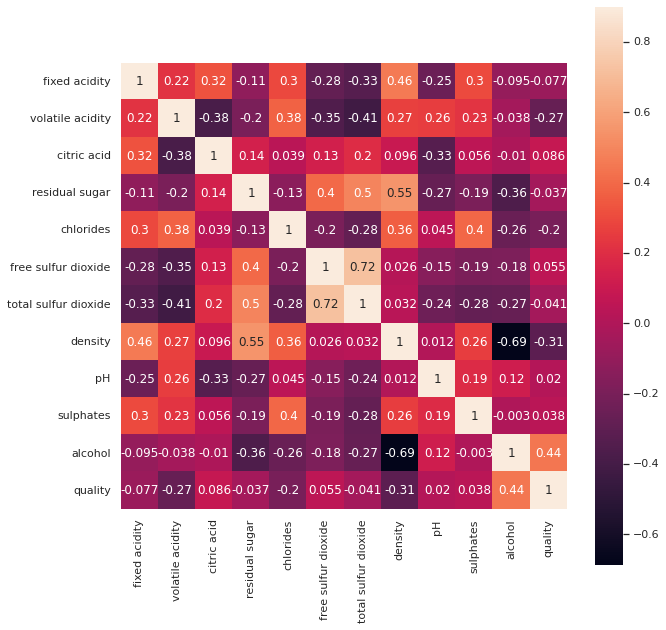

In [123]:
# Feature and target correlation plot with heatmap method.
correlations = merged[my_features + ['quality']].corr()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, square = True, cbar = True, annot = True, vmax = 0.9)
plt.show()

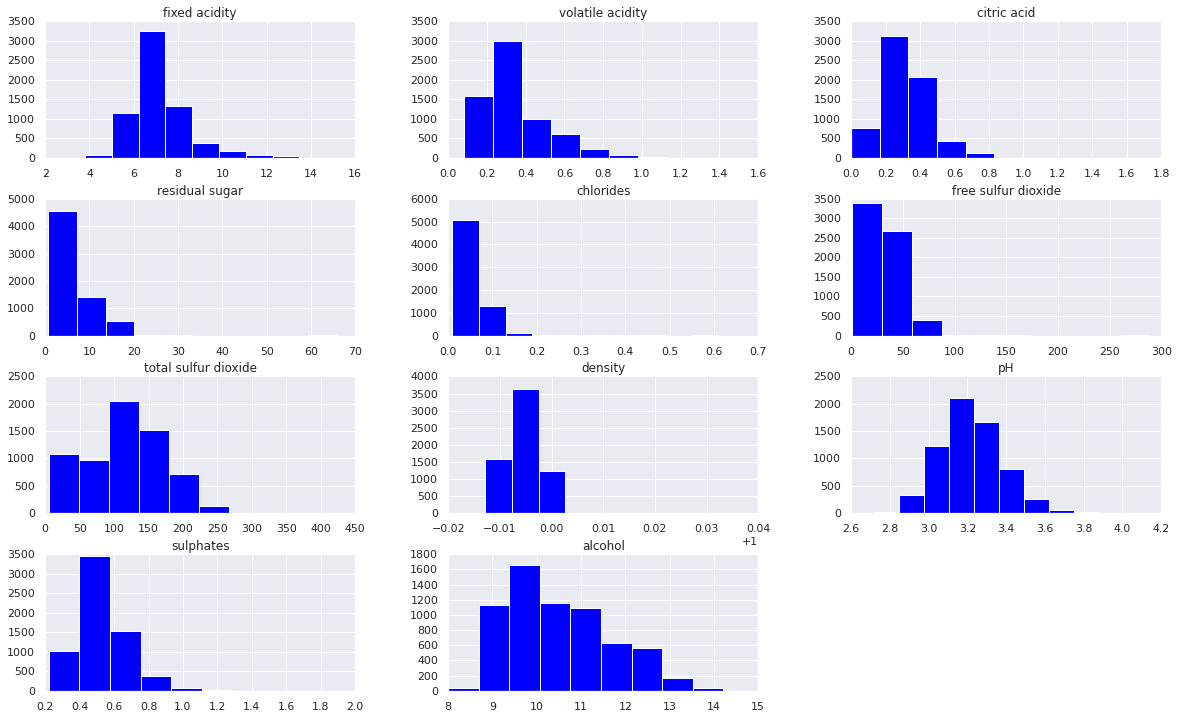

In [124]:
# Value counts & distribution within each numeric feature.
merged[numeric_features].hist(figsize = (20, 12))
plt.show()

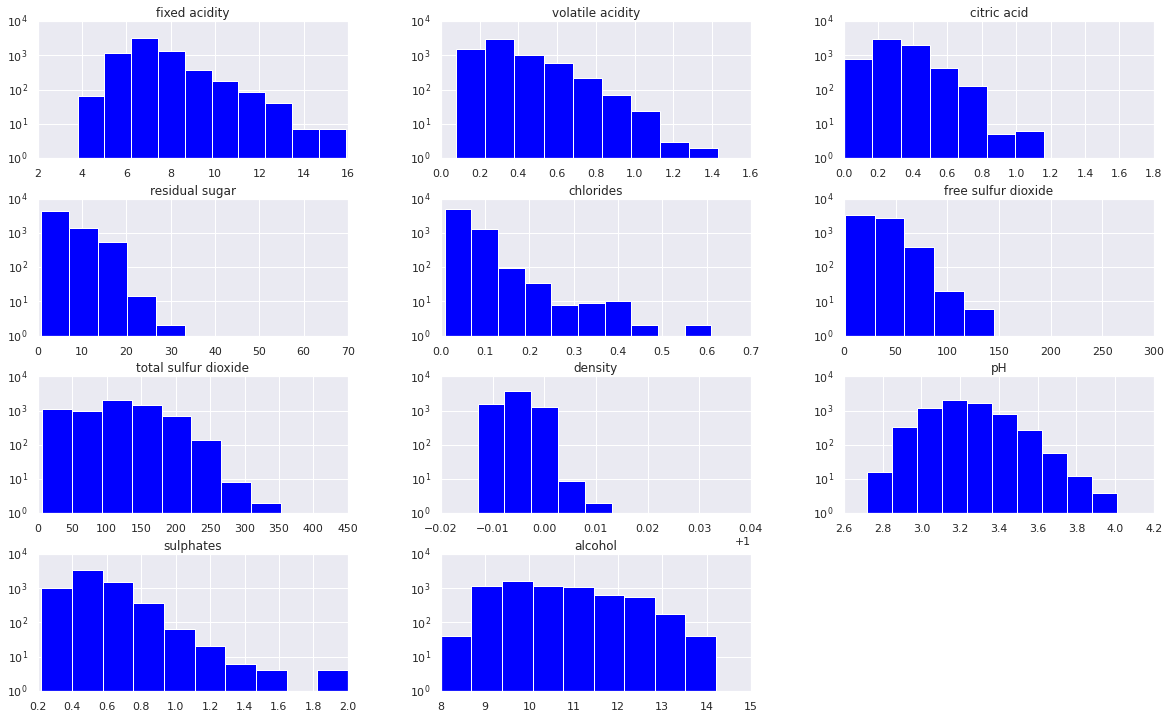

In [125]:
# Verify previous distribution with log transform method.
merged[numeric_features].hist(figsize = (20, 12), log = True)
plt.show()

<p>
The above log - distributed histogram clearly explains the previous actual distribution of values of all numeric features.
</p>

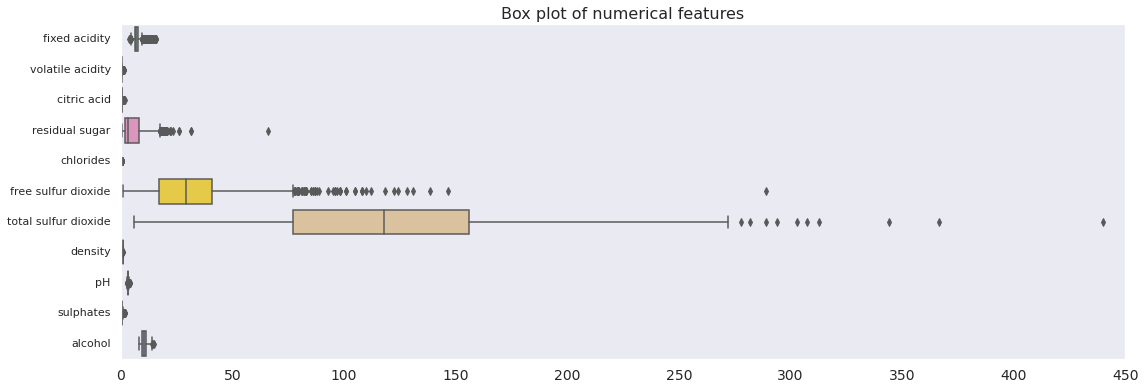

In [126]:
## Box Plot to display outliers.
'''
Outliers are data points which differ significantly from the other recorded values.
It may be due to variability in the measurement or as an indication of experimental error,
the latter are sometimes excluded from the data set. 
It could cause serious problems in statistical analyses.
'''
fig = plt.figure(figsize = (18, 6))
sns.boxplot(data = merged[numeric_features], orient = "h", palette = "Set2");
plt.xticks(fontsize = 14)
plt.title('Box plot of numerical features', fontsize = 16)
plt.show()

<p>
A few mild outliers are detected in features 'free sulfur dioxide', 'residual sugar' and 'fixed acidity'. However the box plot has indicated a somewhat insignificant consentration of these values being separated by a large interval. It should not bother further analysis processes.  
</p>

<p>
The cell below will check any present outliers in the target column('quality') instead :
</p>

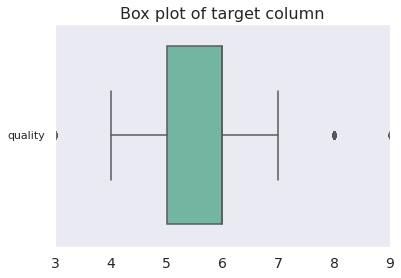

In [127]:
sns.boxplot(data = merged[['quality']], orient = "h", palette = "Set2" )
plt.xticks(fontsize = 14)
plt.title('Box plot of target column', fontsize = 16)
plt.show()

<p>
The target column('quality') however displayed a sign of an even smaller rate of outlier concentration. Just as all other features, it will not be of any issues as well.
</p>